# Machine Learning 3 - Support Vector Machines

A SVM classifier builds a set of hyper-planes to try and separate the data by maximizing the distance between the borders and the data points.

![SVM](http://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_0011.png "Decision border in an SVM")

This separation is generally not possible to achieve in the original data space. Therefore, the first step of the SVM is to project the data into a high or infinite dimensions space in which this linear separation can be done. The projection can be done with linear, polynomial, or more comonly "RBF" kernels.

In [1]:
from lab_tools import CIFAR10, evaluate_classifier, get_hog_image

dataset = CIFAR10('CIFAR10/')

Pre-loading training data
Pre-loading test data


**Build a simple SVM** using [the SVC (Support Vector Classfiication) from sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). 
**Train** it on the CIFAR dataset.

In [3]:
from sklearn.svm import SVC

clf = SVC()
clf.fit( dataset.train['hog'], dataset.train['labels'] )


SVC()

In [4]:
from sklearn.metrics import accuracy_score

#Descriptive performances
pred_train = clf.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train)
print("The accuracy on training set is:", score_train)

#Predictive performances
pred_test = clf.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

The accuracy on training set is: 0.915
The accuracy on test set is: 0.822


In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlBu', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [6]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(dataset.train['labels'], pred_train)
print(cm1)
cm2 = confusion_matrix(dataset.test['labels'], pred_test)
print(cm2)

[[4634  240  126]
 [ 214 4489  297]
 [  71  327 4602]]
[[864 103  33]
 [124 762 114]
 [ 29 131 840]]


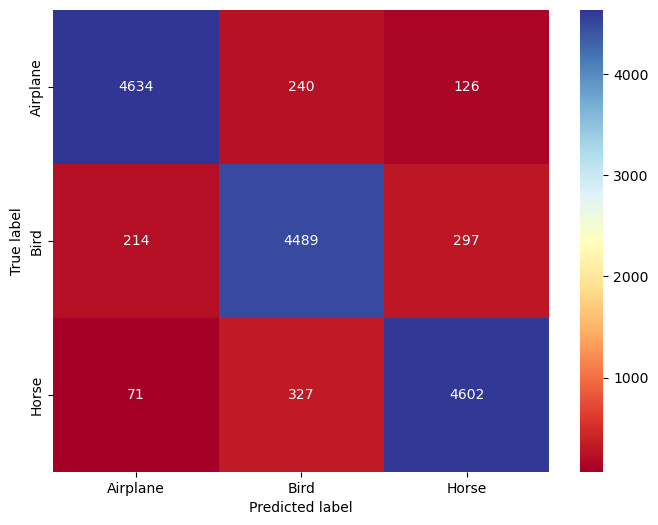

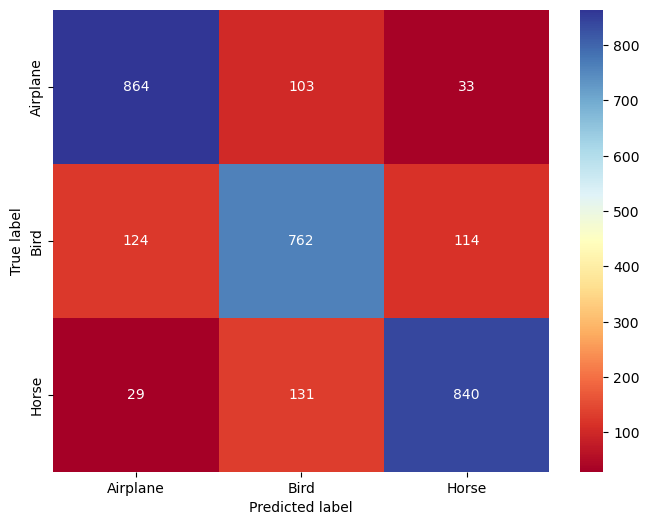

In [7]:
class_names = dataset.labels

plot_confusion_matrix(cm1, class_names)
plot_confusion_matrix(cm2, class_names)

**Explore the classifier**. How many support vectors are there? What are support vectors?

In the context of Support Vector Machines (SVM), including the SVC for classification, support vectors are the data points that lie closest to the decision boundary. These support vectors are critical in defining the position and orientation of the hyperplane that separates the classes in the dataset. In other words, they are the data points that, if moved slightly, could alter the position of the decision boundary. They effectively support the hyperplane, hence the name "support vectors."

In [6]:
all_support_vectors = clf.support_vectors_ #Each line = 1 "Support Vector" ; 1024 columns forming a 32x32 image 
vectors_per_class = clf.n_support_ #Number of "Support Vector" for each class

print(all_support_vectors.shape)
#print(all_support_vectors[0,:10])
print(vectors_per_class)

(8675, 256)
[4.91446270e-04 8.79407786e-05 1.61013613e-04 2.03758626e-04
 3.45150967e-03 2.48147940e-03 2.13056502e-03 5.12550697e-04
 2.98297479e-03 3.81943359e-03]
[2704 3516 2455]


**Try to find the best "C" (error penalty) and "gamma" parameters** using cross-validation. What influence does "C" have on the number of support vectors?

In [8]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

param_grid = {
    'C': [0.1,0.5,1,2,5,10],
    'kernel': ['linear', 'poly', 'rbf'],
}

kf = StratifiedKFold(3)

grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy', verbose=1)
grid_search.fit(dataset.train['hog'], dataset.train['labels'])

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters found: {'C': 5, 'kernel': 'rbf'}
Best cross-validated score: 0.8212


In [5]:
from sklearn.metrics import accuracy_score

clf_best = SVC(C=5, kernel= 'rbf')
clf_best.fit( dataset.train['hog'], dataset.train['labels'] )
#Descriptive performances
pred_train = clf_best.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train)
print("The accuracy on training set is:", score_train)

#Predictive performances
pred_test = clf_best.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

The accuracy on training set is: 0.9942666666666666
The accuracy on test set is: 0.83


In [6]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(dataset.train['labels'], pred_train)
print(cm1)
cm2 = confusion_matrix(dataset.test['labels'], pred_test)
print(cm2)

[[4968   19   13]
 [   6 4970   24]
 [   0   24 4976]]
[[865 103  32]
 [120 779 101]
 [ 40 114 846]]


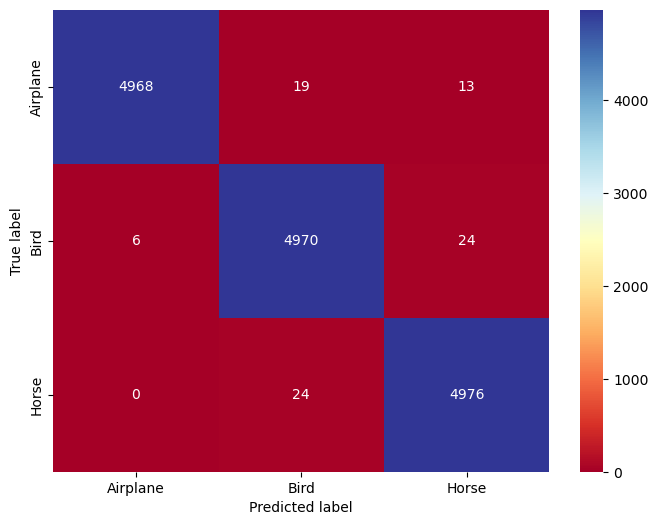

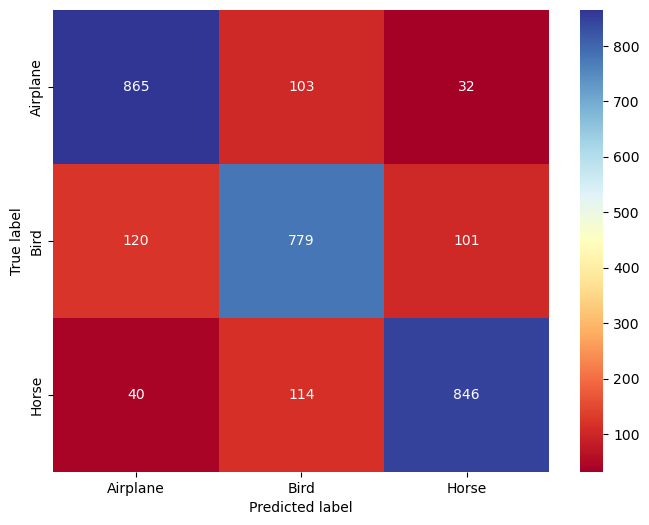

In [9]:
class_names = dataset.labels

plot_confusion_matrix(cm1, class_names)
plot_confusion_matrix(cm2, class_names)

# Comparing algorithms

Using the best hyper-parameters that you found for each of the algorithms (kNN, Decision Trees, Random Forests, MLP, SVM):

* Re-train the models on the full training set.
* Compare their results on the test set.

In [11]:
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#RidgeClassifier
alpha_star = 0.054789579158316636
clf_ridge = RidgeClassifier(alpha=alpha_star)
clf_ridge.fit(dataset.train['hog'],dataset.train['labels'])
pred_ridge = clf_ridge.predict(dataset.test['hog'])
predictive_test_score_ridge = accuracy_score(dataset.test['labels'], pred_ridge)

#KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit( dataset.train['hog'], dataset.train['labels'] )
pred_knn = clf_knn.predict(dataset.test['hog'])
predictive_test_score_knn = accuracy_score(dataset.test['labels'], pred_knn)

#Random trees
clf_randtrees = RandomForestClassifier(n_estimators=150)
clf_randtrees.fit(dataset.train['hog'], dataset.train['labels'])
pred_randtrees = clf_randtrees.predict(dataset.test['hog'])
predictive_test_score_randtrees = accuracy_score(dataset.test['labels'], pred_randtrees)

#MLP 
clf_mlp = MLPClassifier(hidden_layer_sizes=(200,))
clf_mlp.fit( dataset.train['hog'], dataset.train['labels'] )
pred_mlp = clf_mlp.predict(dataset.test['hog'])
predictive_test_score_mlp = accuracy_score(dataset.test['labels'], pred_mlp)

#SVM
clf_svc = SVC()
clf_svc.fit( dataset.train['hog'], dataset.train['labels'] )
pred_svc = clf_svc.predict(dataset.test['hog'])
predictive_test_score_svc = accuracy_score(dataset.test['labels'], pred_svc)

/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
import pandas as pd

p1 = predictive_test_score_ridge
p2 = predictive_test_score_knn
p3 = predictive_test_score_randtrees
p4 = predictive_test_score_mlp
p5 = predictive_test_score_svc

data = {
    'Model': ['Ridge', 'KNN', 'RTrees', 'MLP', 'SVM'],
    'Accuracy': [p1, p2, p3, p4, p5]  
}

df = pd.DataFrame(data)
print(df)

    Model  Accuracy
0   Ridge  0.743667
1     KNN  0.722000
2  RTrees  0.762667
3     MLP  0.804333
4     SVM  0.822000
